In [1]:
%matplotlib inline
import lightkurve as lk
from lightkurve_ext import download_lightcurvefiles
import tic_plot as tplt

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplotlib

import pandas as pd
import astropy as astropy
from astropy.io import fits

In [10]:
# The first exoplanet identified by TESS, Pi Mensae c
# (the system already has a known exoplanet prior to the discovery of 'c')
# http://exoplanet.eu/catalog/kelt-18_b/
# https://exo.mast.stsci.edu/exomast_planet.html?planet=TIC293687315b
# https://exofop.ipac.caltech.edu/tess/target.php?id=293687315
tic = 293687315 # KELT 18b, one of the known one. data from TESS (TOI 1300.01)

# Load the light_curves into collection
# somehow no data found
lcf_coll = download_lightcurvefiles(f"TIC{tic}", mission='TESS', download_dir='./data', use_cache='no')
print(len(lcf_coll))


C:\pkg\_winNonPortables\Anaconda3\lib\site-packages\lightkurve\search.py:229: LightkurveWarning: Cannot download from an empty search result.
  LightkurveWarning)


TypeError: object of type 'NoneType' has no len()

In [3]:
# search_res = lk.search.search_lightcurvefile(f"TIC{tic}", mission='TESS')
# search_res.table
#
# entry = search_res.table[0]
# entry['obs_collection'] +  '/' + entry['obs_id'] + '/' + entry['productFilename']
# list(map(lambda e: e['obs_collection'] +  '/' + e['obs_id'] + '/' + e['productFilename']
#          , search_res.table))


In [4]:
if False: 
    fig = plt.figure(figsize=(30,15))
    tplt.plot_lcf_flux_delta(tplt.lcf_of_sector(lcf_coll, 15), fig.gca()
                     , xmin=1734.5, xmax=1735.5
                       )


Sectors: [1, 4, 8, 11, 12, 13]


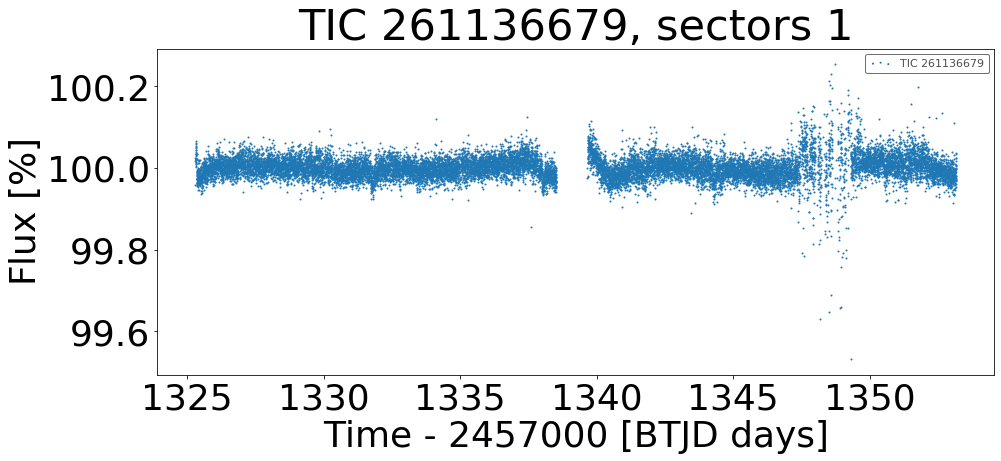

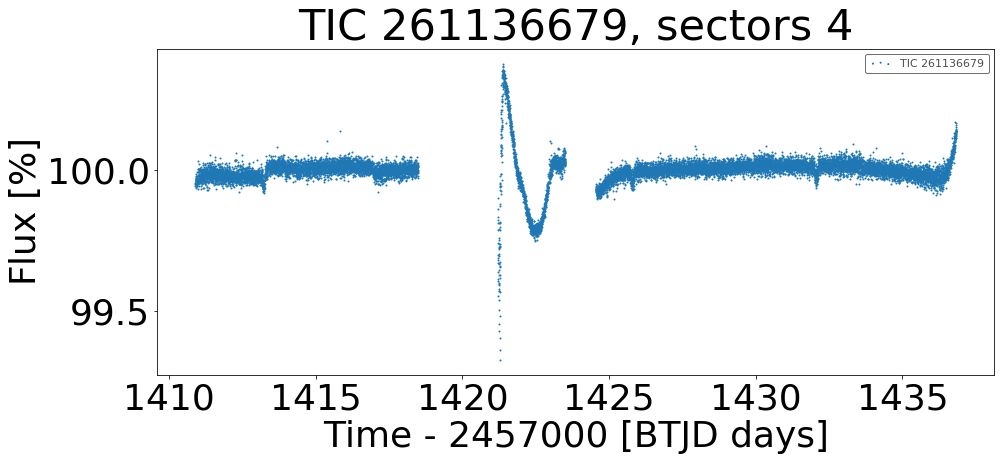

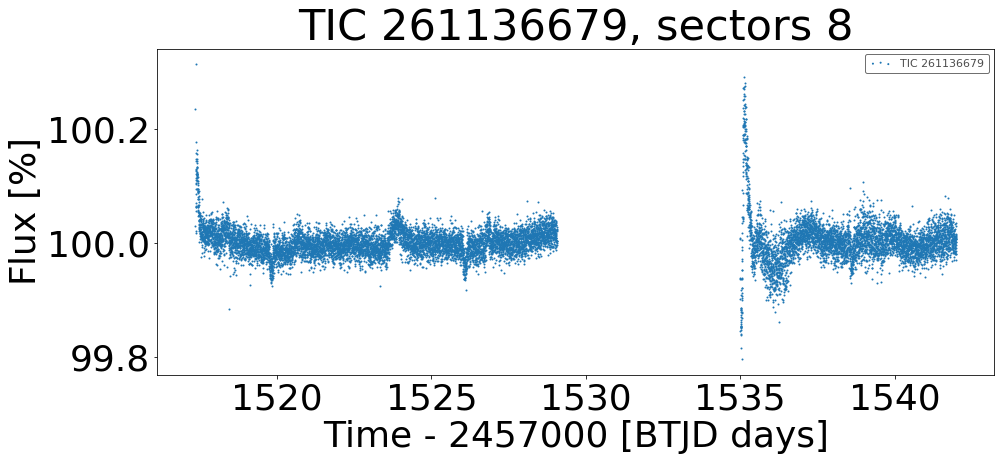

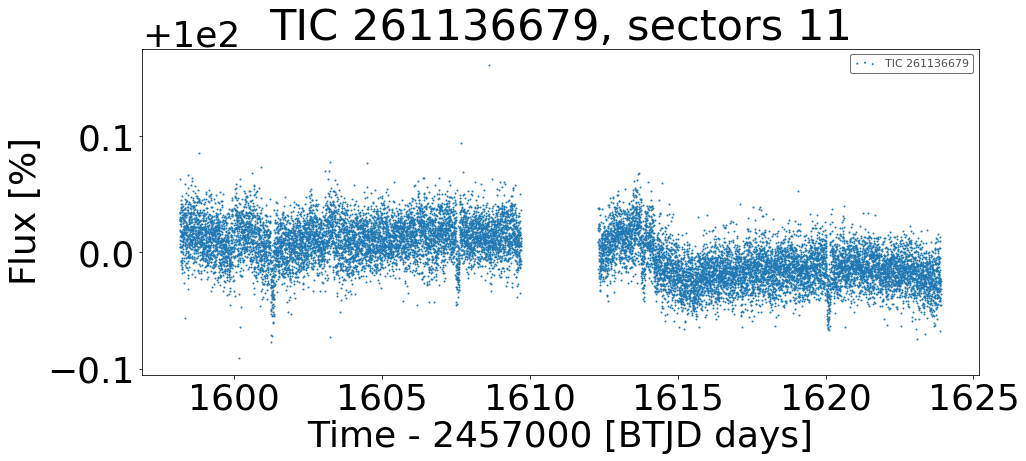

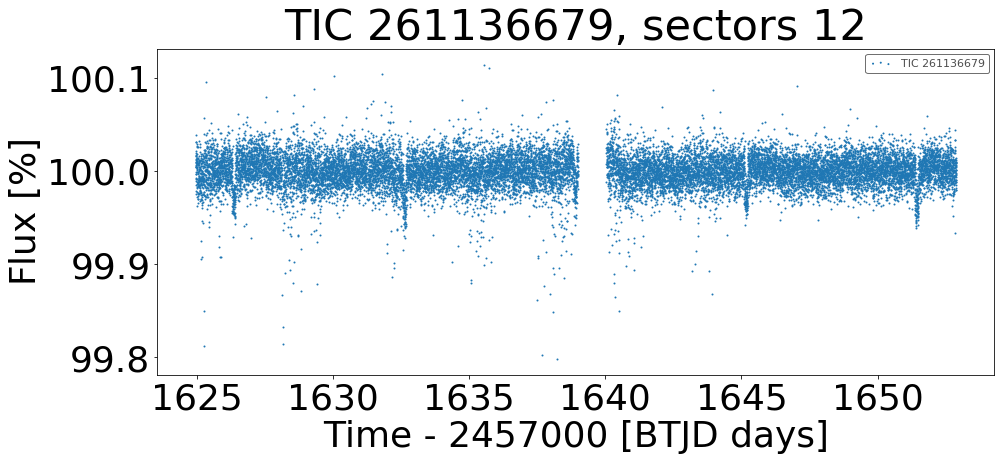

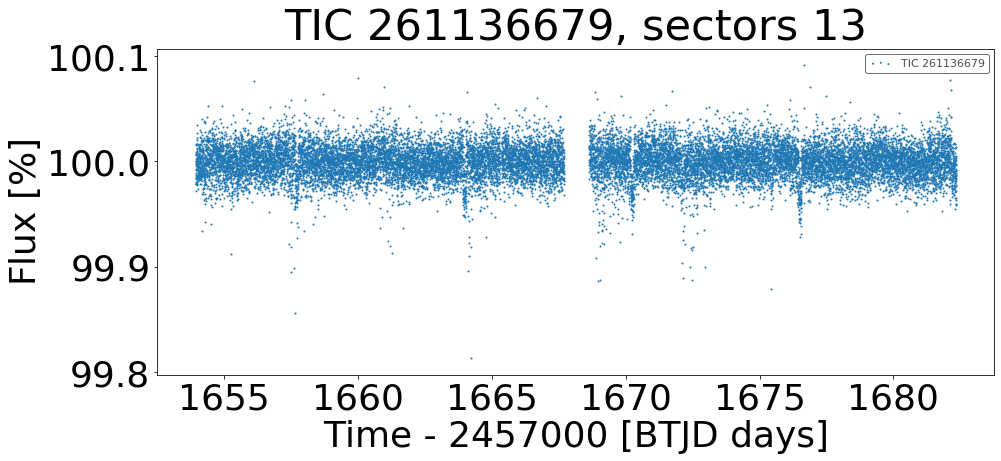

In [5]:
def plot_selected(lcf_coll):                      
    matplotlib.rcParams.update({'font.size':18}) 
    matplotlib.rcParams.update({'font.family':'sans-serif'})
    tplt.plot_n_annotate_lcf(tplt.lcf_of_sector(lcf_coll, 14), ax=tplt.lcf_fig().gca()
                        , t0=1704.58, t_start=1704.51, t_end=1704.65
                       )
    tplt.plot_n_annotate_lcf(tplt.lcf_of_sector(lcf_coll, 15), ax=tplt.lcf_fig().gca()
                        , t0=1735.10, t_start=1735.03, t_end=1735.17
                       )
#     print(f"Period ~= {as_4decimal(1622.5 - 1538.6)} days")
    return 

                     
tplt.plot_all(lcf_coll)

# plot_selected(lcf_coll)

print("Sectors: " + str(list(map(lambda lcf: lcf.get_header()['SECTOR'], lcf_coll))))


In [6]:
print(list(map(lambda lc: lc.get_header()['SECTOR'], lcf_coll)))
print(list(map(lambda lc: lc.get_header()['CAMERA'], lcf_coll)))
print(list(map(lambda lc: lc.get_header()['DATE-OBS'], lcf_coll)))


[1, 4, 8, 11, 12, 13]
[4, 4, 4, 4, 3, 3]
['2018-07-25T19:01:42.709Z', '2018-10-19T09:35:40.521Z', '2019-02-02T20:09:35.998Z', '2019-04-23T06:29:33.130Z', '2019-05-21T10:45:32.097Z', '2019-06-19T09:55:31.020Z']


In [7]:
# combine all the observations together
# or I can just use lcf_coll.stich()
lc = None
for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    if lc == None:
        lc = lc_cur    
    else:
        lc.append(lc_cur, inplace=True)
    
print(len(lc.time))

for i in range(0, len(lcf_coll)):
    lc_cur = lcf_coll[i].get_lightcurve('PDCSAP_FLUX')
    print(f"  Sector {lcf_coll[i].get_header()['SECTOR']}: {lc_cur.time.min()} - {lc_cur.time.max()}")

print(lc.time.max()  - lc.time.min())

# use the interactive transit period detection
#   caveat: un-sure if combining observations over time make sense for the algorithm
lc.interact_bls()


104572
  Sector 1: 1325.2969832846081 - 1353.1770887053747
  Sector 4: 1410.9021423486195 - 1436.8488570330412
  Sector 8: 1517.3459905681957 - 1541.999225928776
  Sector 11: 1596.7782453333475 - 1623.8926084826935
  Sector 12: 1624.9565034577033 - 1652.8928415938433
  Sector 13: 1653.9220076417546 - 1682.3580240458518
357.0610407612437
